Automating Crypto Website API Pull Using Python

In [10]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [11]:
type(data)

dict

In [12]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975044e+07,1.975044e+07,False,NaN,1,NaN,NaN,None,2024-09-06T14:40:00.000Z,55124.361928,3.707732e+10,16.9041,-2.178706,-3.508301,-6.763139,-1.066879,-1.196558,-20.519707,1.088731e+12,56.1597,1.157612e+12,None,2024-09-06T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
1,1027,Ethereum,ETH,ethereum,9264,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203172e+08,1.203172e+08,True,NaN,2,NaN,NaN,None,2024-09-06T14:39:00.000Z,2338.701326,1.663072e+10,21.5070,-1.897499,-2.684324,-6.196519,-1.713497,-20.747281,-36.621779,2.813860e+11,14.5141,2.813860e+11,None,2024-09-06T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
2,825,Tether USDt,USDT,tether,96546,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.181363e+11,1.202409e+11,True,NaN,3,NaN,NaN,None,2024-09-06T14:39:00.000Z,0.999490,5.572069e+10,13.2498,-0.050797,-0.043826,-0.051850,-0.138501,-0.089418,-0.020441,1.180760e+11,6.0905,1.201796e+11,None,2024-09-06T14:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-06 15:41:52.951791
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459346e+08,1.459346e+08,False,NaN,4,NaN,NaN,None,2024-09-06T14:39:00.000Z,498.278042,1.600824e+09,1.5756,-1.724562,-1.877209,-7.309349,4.864086,0.313140,-27.345920,7.271601e+10,3.7509,7.271601e+10,None,2024-09-06T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.669668e+08,5.839842e+08,True,NaN,5,NaN,NaN,None,2024-09-06T14:39:00.000Z,129.389899,2.404022e+09,19.5898,-3.078549,-3.229639,-6.156825,-12.465449,-4.574728,-19.328838,6.042079e+10,3.1166,7.556166e+10,None,2024-09-06T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
5,3408,USDC,USDC,usd-coin,21862,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.498201e+10,3.498201e+10,False,NaN,6,NaN,NaN,None,2024-09-06T14:39:00.000Z,0.999858,7.236763e+09,26.9711,-0.030460,-0.010980,-0.003415,-0.039425,-0.082197,-0.028382,3.497703e+10,1.8041,3.497703e+10,None,2024-09-06T14:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-06 15:41:52.951791
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,None,2024-09-06T14:40:00.000Z,0.531471,1.142267e+09,31.3370,-1.887578,-4.106090,-5.076847,7.521753,24.172051,7.517896,2.989606e+10,1.5400,5.314707e+10,None,2024-09-06T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.458448e+11,1.458448e+11,True,NaN,8,NaN,NaN,None,2024-09-06T14:40:00.000Z,0.094611,5.751693e+08,25.0402,-1.737418,-4.148331,-5.432072,-1.641066,-10.462077,-35.249535,1.379852e+10,0.7108,1.379852e+10,None,2024-09-06T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
8,1958,TRON,TRX,tron,1022,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8

In [26]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 

    if not os.path.isfile(r'C:\Users\Fatima Al-Babily\OneDrive\Documents\CryptoAutomation\API.csv'):
        df.to_csv(r'C:\Users\Fatima Al-Babily\OneDrive\Documents\CryptoAutomation\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Fatima Al-Babily\OneDrive\Documents\CryptoAutomation\API.csv', mode='a', header=False)
        




In [27]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [28]:
df_crypto = pd.read_csv(r'C:\Users\Fatima Al-Babily\OneDrive\Documents\CryptoAutomation\API.csv')
df_crypto

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.975046e+07,1.975046e+07,False,NaN,1,NaN,NaN,NaN,2024-09-06T15:14:00.000Z,54541.380167,3.803700e+10,23.1800,-1.111999,-3.544330,-6.887048,-2.961421,-3.541127,-21.490939,1.077218e+12,55.7327,1.145369e+12,NaN,2024-09-06T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:15:24.432337
1,1,1027,Ethereum,ETH,ethereum,9264,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203172e+08,1.203172e+08,True,NaN,2,NaN,NaN,NaN,2024-09-06T15:13:00.000Z,2316.005793,1.695906e+10,25.6861,-1.026627,-2.800734,-6.136352,-3.348035,-23.485864,-37.315599,2.786553e+11,14.4085,2.786553e+11,NaN,2024-09-06T15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:15:24.432337
2,2,825,Tether USDt,USDT,tether,96548,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.181363e+11,1.202409e+11,True,NaN,3,NaN,NaN,NaN,2024-09-06T15:13:00.000Z,0.999424,5.688298e+10,18.4519,-0.054771,-0.048437,-0.053056,-0.119502,-0.063522,-0.030136,1.180682e+11,6.1050,1.201716e+11,NaN,2024-09-06T15:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-06 16:15:24.432337
3,3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459346e+08,1.459346e+08,False,NaN,4,NaN,NaN,NaN,2024-09-06T15:13:00.000Z,496.002165,1.603374e+09,4.8299,-0.538342,-1.658355,-6.481763,3.445627,-2.210411,-27.833271,7.238388e+10,3.7450,7.238388e+10,NaN,2024-09-06T15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:15:24.432337
4,4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.669667e+08,5.839842e+08,True,NaN,5,NaN,NaN,NaN,2024-09-06T15:13:00.000Z,128.650471,2.405540e+09,26.0583,-0.596471,-2.698827,-4.612788,-13.117722,-7.833609,-20.030889,6.007549e+10,3.1063,7.512984e+10,NaN,2024-09-06T15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:15:24.432337
5,5,3408,USDC,USDC,usd-coin,21862,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.491545e+10,3.491545e+10,False,NaN,6,NaN,NaN,NaN,2024-09-06T15:13:00.000Z,0.999972,7.470937e+09,34.9485,-0.025455,0.001227,0.003069,-0.022803,-0.039132,-0.009835,3.491447e+10,1.8053,3.491447e+10,NaN,2024-09-06T15:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-06 16:15:24.432337
6,6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,NaN,2024-09-06T15:14:00.000Z,0.529325,1.161624e+09,36.1031,-0.271903,-3.815619,-4.826596,5.898197,22.263222,6.906640,2.977534e+10,1.5396,5.293248e+10,NaN,2024-09-06T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:15:24.432337
7,7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.458452e+11,1.458452e+11,True,NaN,8,NaN,NaN,NaN,2024-09-06T15:14:00.000Z,0.093859,5.832787e+08,30.2436,-0.726086,-5.075068,-5.439656,-4.148604,-12.782246,-35.981587,1.368892e+10,0.7078,1.368892e+10,NaN,2024-09-06T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:15:24.432337
8,8,1958,TRON,TRX,tron,1022,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'lay

In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975044e+07,1.975044e+07,False,NaN,1,NaN,NaN,None,2024-09-06T14:40:00.000Z,55124.361928,3.707732e+10,16.9041,-2.178706,-3.508301,-6.763139,-1.066879,-1.196558,-20.519707,1.088731e+12,56.1597,1.157612e+12,None,2024-09-06T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
1,1027,Ethereum,ETH,ethereum,9264,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203172e+08,1.203172e+08,True,NaN,2,NaN,NaN,None,2024-09-06T14:39:00.000Z,2338.701326,1.663072e+10,21.5070,-1.897499,-2.684324,-6.196519,-1.713497,-20.747281,-36.621779,2.813860e+11,14.5141,2.813860e+11,None,2024-09-06T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
2,825,Tether USDt,USDT,tether,96546,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.181363e+11,1.202409e+11,True,NaN,3,NaN,NaN,None,2024-09-06T14:39:00.000Z,0.999490,5.572069e+10,13.2498,-0.050797,-0.043826,-0.051850,-0.138501,-0.089418,-0.020441,1.180760e+11,6.0905,1.201796e+11,None,2024-09-06T14:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-06 15:41:52.951791
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459346e+08,1.459346e+08,False,NaN,4,NaN,NaN,None,2024-09-06T14:39:00.000Z,498.278042,1.600824e+09,1.5756,-1.724562,-1.877209,-7.309349,4.864086,0.313140,-27.345920,7.271601e+10,3.7509,7.271601e+10,None,2024-09-06T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.669668e+08,5.839842e+08,True,NaN,5,NaN,NaN,None,2024-09-06T14:39:00.000Z,129.389899,2.404022e+09,19.5898,-3.078549,-3.229639,-6.156825,-12.465449,-4.574728,-19.328838,6.042079e+10,3.1166,7.556166e+10,None,2024-09-06T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
5,3408,USDC,USDC,usd-coin,21862,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.498201e+10,3.498201e+10,False,NaN,6,NaN,NaN,None,2024-09-06T14:39:00.000Z,0.999858,7.236763e+09,26.9711,-0.030460,-0.010980,-0.003415,-0.039425,-0.082197,-0.028382,3.497703e+10,1.8041,3.497703e+10,None,2024-09-06T14:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-06 15:41:52.951791
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,None,2024-09-06T14:40:00.000Z,0.531471,1.142267e+09,31.3370,-1.887578,-4.106090,-5.076847,7.521753,24.172051,7.517896,2.989606e+10,1.5400,5.314707e+10,None,2024-09-06T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.458448e+11,1.458448e+11,True,NaN,8,NaN,NaN,None,2024-09-06T14:40:00.000Z,0.094611,5.751693e+08,25.0402,-1.737418,-4.148331,-5.432072,-1.641066,-10.462077,-35.249535,1.379852e+10,0.7108,1.379852e+10,None,2024-09-06T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 15:41:52.951791
8,1958,TRON,TRX,tron,1022,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8

In [29]:
#Remove scientific notation keep original number

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [30]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19750465.00000,19750465.00000,False,NaN,1,NaN,NaN,None,2024-09-06T15:15:00.000Z,54455.97822,38047508060.04022,23.23140,-1.16999,-3.58837,-7.03211,-3.14194,-3.57796,-21.60942,1075530891886.63843,55.64540,1143575542632.51001,None,2024-09-06T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:16:24.671255
1,1027,Ethereum,ETH,ethereum,9264,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120317181.32366,120317181.32366,True,NaN,2,NaN,NaN,None,2024-09-06T15:14:00.000Z,2319.52153,16993335590.22314,25.94100,-0.63882,-2.59637,-6.01564,-3.17420,-23.11139,-37.21666,279078292297.69318,14.43040,279078292297.69000,None,2024-09-06T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:16:24.671255
2,825,Tether USDt,USDT,tether,96548,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118136286822.52271,120240893180.00955,True,NaN,3,NaN,NaN,None,2024-09-06T15:14:00.000Z,0.99953,56962079355.57320,18.67740,-0.00359,-0.04147,-0.05710,-0.12929,-0.03769,-0.01950,118081006402.86555,6.10570,120184627935.74001,None,2024-09-06T15:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-06 16:16:24.671255
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145934600.71598,145934600.71598,False,NaN,4,NaN,NaN,None,2024-09-06T15:14:00.000Z,496.00817,1603843631.49549,4.94240,-0.40581,-1.62710,-6.49892,3.53839,-2.12449,-27.83182,72384754552.26147,3.74500,72384754552.25999,None,2024-09-06T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:16:24.671255
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466966734.17297,583984184.69149,True,NaN,5,NaN,NaN,None,2024-09-06T15:14:00.000Z,128.66159,2417259314.69537,27.04450,-0.49060,-2.67503,-4.61458,-13.07086,-7.69589,-20.02237,60080680970.87800,3.10660,75136331830.21001,None,2024-09-06T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:16:24.671255
5,3408,USDC,USDC,usd-coin,21862,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34915447102.14004,34915447102.14004,False,NaN,6,NaN,NaN,None,2024-09-06T15:14:00.000Z,0.99997,7511434941.63594,35.85570,0.02156,-0.01026,-0.00786,-0.05252,-0.02076,-0.01063,34914566976.47052,1.80530,34914566976.47000,None,2024-09-06T15:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-06 16:16:24.671255
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56251561168.00000,99987294444.00000,False,NaN,7,NaN,NaN,None,2024-09-06T15:15:00.000Z,0.52935,1161718566.68936,36.14290,-0.31374,-3.79062,-4.82576,5.90052,22.44473,6.92176,29776883372.18431,1.54110,52935212381.49000,None,2024-09-06T15:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-06 16:16:24.671255
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145845156383.70523,145845156383.70523,True,NaN,8,NaN,NaN,None,2024-09-06T15:15:00.000Z,0.09387,583373507.67666,30.25910,-0.76538,-5.00793,-5.43218,-4.16284,-12.70090,-35.96796,13690098073.26130,0.70850,13690098073.26000,None,2024-09-06T15:15

In [31]:
# look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.16999,-3.58837,-7.03211,-3.14194,-3.57796,-21.60942
Ethereum,-0.63882,-2.59637,-6.01564,-3.17420,-23.11139,-37.21666
Tether USDt,-0.00359,-0.04147,-0.05710,-0.12929,-0.03769,-0.01950
BNB,-0.40581,-1.62710,-6.49892,3.53839,-2.12449,-27.83182
Solana,-0.49060,-2.67503,-4.61458,-13.07086,-7.69589,-20.02237
USDC,0.02156,-0.01026,-0.00786,-0.05252,-0.02076,-0.01063
XRP,-0.31374,-3.79062,-4.82576,5.90052,22.44473,6.92176
Dogecoin,-0.76538,-5.00793,-5.43218,-4.16284,-12.70090,-35.96796
TRON,0.16619,-1.02520,-7.31608,19.81399,18.98906,30.93591


In [32]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -1.16999
              quote.USD.percent_change_24h    -3.58837
              quote.USD.percent_change_7d     -7.03211
              quote.USD.percent_change_30d    -3.14194
              quote.USD.percent_change_60d    -3.57796
              quote.USD.percent_change_90d   -21.60942
Ethereum      quote.USD.percent_change_1h     -0.63882
              quote.USD.percent_change_24h    -2.59637
              quote.USD.percent_change_7d     -6.01564
              quote.USD.percent_change_30d    -3.17420
              quote.USD.percent_change_60d   -23.11139
              quote.USD.percent_change_90d   -37.21666
Tether USDt   quote.USD.percent_change_1h     -0.00359
              quote.USD.percent_change_24h    -0.04147
              quote.USD.percent_change_7d     -0.05710
              quote.USD.percent_change_30d    -0.12929
              quote.USD.percent_change_60d    -0.03769
              quote.US

In [33]:
type(df4)

pandas.core.series.Series

In [34]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -1.16999
             quote.USD.percent_change_24h  -3.58837
             quote.USD.percent_change_7d   -7.03211
             quote.USD.percent_change_30d  -3.14194
             quote.USD.percent_change_60d  -3.57796
             quote.USD.percent_change_90d -21.60942
Ethereum     quote.USD.percent_change_1h   -0.63882
             quote.USD.percent_change_24h  -2.59637
             quote.USD.percent_change_7d   -6.01564
             quote.USD.percent_change_30d  -3.17420
             quote.USD.percent_change_60d -23.11139
             quote.USD.percent_change_90d -37.21666
Tether USDt  quote.USD.percent_change_1h   -0.00359
             quote.USD.percent_change_24h  -0.04147
             quote.USD.percent_change_7d   -0.05710
             quote.USD.percent_change_30d  -0.12929
             quote.USD.percent_change_60d  -0.03769
             quote.USD.percent_change_90d  -0.01950
BNB          quote.USD.percent_change_1h   -0.40581
             quote.USD.percent_change_24h  -1.62710
             quote.USD.percent_change_7d   -6.49892
             quote.USD.percent_change_30d   3.53839
             quote.USD.percent_change_60d  -2.12449
             quote.USD.percent_change_90d -27.83182
Solana       quote.USD.percent_change_1h   -0.49060
             quote.USD.percent_change_24h  -2.67503
             quote.USD.percent_change_7d   -4.61458
             quote.USD.percent_change_30d -13.07086
             quote.USD.percent_change_60d  -7.69589
             quote.USD.percent_change_90d -20.02237
USDC         quote.USD.percent_change_1h    0.02156
             quote.USD.percent_change_24h  -0.01026
             quote.USD.percent_change_7d   -0.00786
             quote.USD.percent_change_30d  -0.05252
             quote.USD.percent_change_60d  -0.02076
             quote.USD.percent_change_90d  -0.01063
XRP          quote.USD.percent_change_1h   -0.31374
             quote.USD.percent_change_24h  -3.79062
             quote.USD.percent_change_7d   -4.82576
             quote.USD.percent_change_30d   5.90052
             quote.USD.percent_change_60d  22.44473
             quote.USD.percent_change_90d   6.92176
Dogecoin     quote.USD.percent_change_1h   -0.76538
             quote.USD.percent_change_24h  -5.00793
             quote.USD.percent_change_7d   -5.43218
             quote.USD.percent_change_30d  -4.16284
             quote.USD.percent_change_60d -12.70090
             quote.USD.percent_change_90d -35.96796
TRON         quote.USD.percent_change_1h    0.16619
             quote.USD.percent_change_24h  -1.02520
             quote.USD.percent_change_7d   -7.31608
             quote.USD.percent_change_30d  19.81399
             quote.USD.percent_change_60d  18.98906
             quote.USD.percent_change_90d  30.93591
Toncoin      quote.USD.percent_change_1h    1.10704
             quote.USD.percent_change_24h   2.42334
             quote.USD.percent_change_7d  -11.68092
             quote.USD.percent_change_30d -13.56431
             quote.USD.percent_change_60d -32.92713
             quote.USD.percent_change_90d -33.87409
Cardano      quote.USD.percent_change_1h    0.52225
             quote.USD.percent_change_24h  -3.77315
             quote.USD.percent_change_7d   -7.90942
             quote.USD.percent_change_30d  -2.34198
             quote.USD.percent_change_60d -13.89161
             quote.USD.percent_change_90d -27.34532
Avalanche    quote.USD.percent_change_1h    0.05239
             quote.USD.percent_change_24h  -0.41961
             quote.USD.percent_change_7d   -5.04579
             quote.USD.percent_change_30d   5.19305
             quote.USD.percent_change_60d -18.61948
             quote.USD.percent_change_90d -34.24973
Shiba Inu    quote.USD.percent_change_1h    0.12731
             quote.USD.percent_change_24h  -2.73906
             quote.USD.percent_change_7d   -6.55993
             quote.USD.percent_change_30d

In [35]:
df5.count()

values    90
dtype: int64

In [45]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.16999
1,Bitcoin,quote.USD.percent_change_24h,-3.58837
2,Bitcoin,quote.USD.percent_change_7d,-7.03211
3,Bitcoin,quote.USD.percent_change_30d,-3.14194
4,Bitcoin,quote.USD.percent_change_60d,-3.57796
5,Bitcoin,quote.USD.percent_change_90d,-21.60942
6,Ethereum,quote.USD.percent_change_1h,-0.63882
7,Ethereum,quote.USD.percent_change_24h,-2.59637
8,Ethereum,quote.USD.percent_change_7d,-6.01564
9,Ethereum,quote.USD.percent_change_30d,-3.17420


In [46]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.16999
1,Bitcoin,quote.USD.percent_change_24h,-3.58837
2,Bitcoin,quote.USD.percent_change_7d,-7.03211
3,Bitcoin,quote.USD.percent_change_30d,-3.14194
4,Bitcoin,quote.USD.percent_change_60d,-3.57796
5,Bitcoin,quote.USD.percent_change_90d,-21.60942
6,Ethereum,quote.USD.percent_change_1h,-0.63882
7,Ethereum,quote.USD.percent_change_24h,-2.59637
8,Ethereum,quote.USD.percent_change_7d,-6.01564
9,Ethereum,quote.USD.percent_change_30d,-3.17420


In [47]:
print(df7.columns)



Index(['name', 'percent_change', 'values'], dtype='object')


In [48]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.16999
1,Bitcoin,24h,-3.58837
2,Bitcoin,7d,-7.03211
3,Bitcoin,30d,-3.14194
4,Bitcoin,60d,-3.57796
5,Bitcoin,90d,-21.60942
6,Ethereum,quote.USD.percent_change_1h,-0.63882
7,Ethereum,24h,-2.59637
8,Ethereum,7d,-6.01564
9,Ethereum,30d,-3.17420


In [54]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,-1.16999
1,Bitcoin,24h,-3.58837
2,Bitcoin,7d,-7.03211
3,Bitcoin,30d,-3.14194
4,Bitcoin,60d,-3.57796
5,Bitcoin,90d,-21.60942
6,Ethereum,1h,-0.63882
7,Ethereum,24h,-2.59637
8,Ethereum,7d,-6.01564
9,Ethereum,30d,-3.17420


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

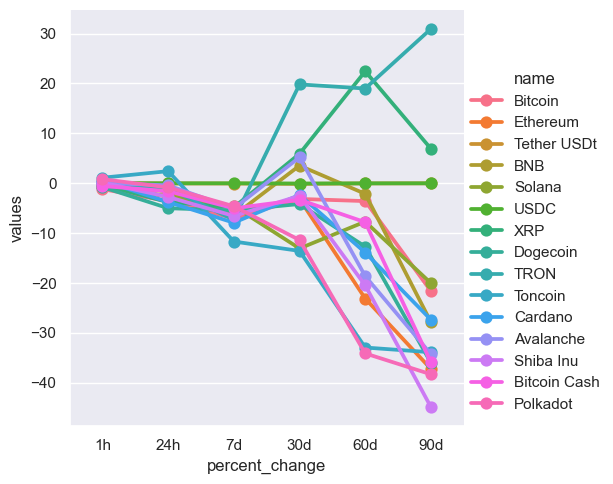

In [55]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')